In [19]:
# helper functions and imports

from numpy.random import normal as normal_rand
import seaborn as sns
import pandas as pd


def frequencyToSeconds(hz: float) -> float:
    return 1.0 / float(hz)


def plot_points(dataframe: pd.DataFrame, x: str):
    melted_dataframe = dataframe.melt(x, var_name="Columns", value_name="Values")
    sns.catplot(data=melted_dataframe, x=x, y="Values", hue="Columns", kind="point")


def plot_lines(dataframe: pd.DataFrame, x: str):
    melted_dataframe = dataframe.melt(x, var_name="Columns", value_name="Values")
    sns.lineplot(data=melted_dataframe, x=x, y="Values", hue="Columns")


In [20]:
# gyro parameters and variables

gyroTrueRollValue = 0.0  # deg/s
gyroTrueDrift = 1.0  # deg/s
gyroSigmaNoiseAbsolute = 0.05  # deg/s
gyroSigmaNoiseRelative = 0.03  # percent

# accelerometer parameters and variables

accelTrueXValue = 0.0  # g
accelTrueXAcceleration = 0.0  # g
accelSigmaNoiseRelative = 0.03  # percent

# simulation parameters

dataOutputFrequency = 100  # hz
deltaTime = frequencyToSeconds(dataOutputFrequency)  # seconds
simulationTime = 10  # seconds


In [21]:
# run the simulation


currentTime = 0.0
gyroCurrentTrueRollVelocity = 0.0  # deg/s
gyroCurrentTrueRollValue = 0.0  # deg
gyroMeasurementValue = 0.0  # deg/s

gyroTrueRollValues = []
gyroMeasurements = []
timePoints = []

for n in range(simulationTime * dataOutputFrequency):
    # Set gyro velocity to simulate rotation

    gyroCurrentTrueRollVelocity = 0.0
    if 1 <= currentTime < 3:
        gyroCurrentTrueRollVelocity = 30.0
    elif 4 <= currentTime < 5.5:
        gyroCurrentTrueRollVelocity = -70.0
    elif 7 <= currentTime < 9:
        gyroCurrentTrueRollVelocity = 10.0

    # generate data
    gyroCurrentTrueRollValue += gyroCurrentTrueRollVelocity * deltaTime
    gyroMeasurementValue = (
        gyroCurrentTrueRollVelocity
        - gyroTrueDrift
        + normal_rand(0, gyroSigmaNoiseAbsolute)
    )

    gyroTrueRollValues.append(gyroCurrentTrueRollValue)
    gyroMeasurements.append(gyroMeasurementValue)
    timePoints.append(currentTime)

    # update time
    currentTime += deltaTime


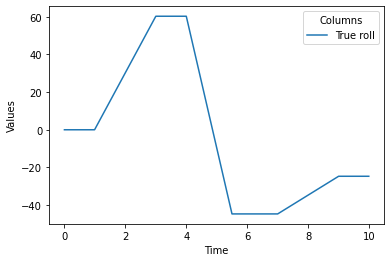

In [22]:
df = pd.DataFrame(
    {
        "Time": timePoints,
        "True roll": gyroTrueRollValues,
        # "Measurements": gyroMeasurements,
    }
)

plot_lines(df, "Time")
